# 3.1 一元线性回归

# 3.1.2 一元线性回归的代码实现

1.绘制散点图

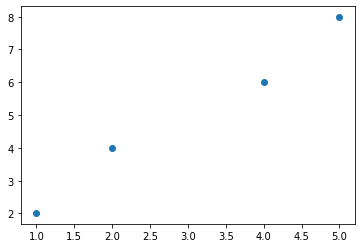

In [2]:
import matplotlib.pyplot as plt
X = [[1], [2], [4], [5]]
Y = [2, 4, 6, 8]
plt.scatter(X, Y)
plt.show()

2.引入Scikit-learn库搭建模型

In [3]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3.模型预测

In [4]:
# 模型预测 - 预测一个数据
y = regr.predict([[1.5]])
print(y)

[2.9]


In [5]:
# 模型预测 - 预测多个数据
y = regr.predict([[1.5], [2.5], [4.5]])
print(y)

[2.9 4.3 7.1]


4.模型可视化

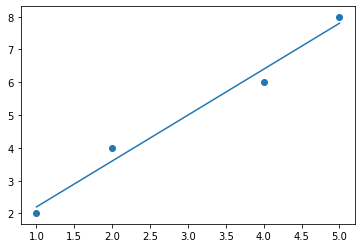

In [6]:
plt.scatter(X, Y)
plt.plot(X, regr.predict(X))
plt.show()

5.线性回归方程构造

In [7]:
print('系数a为:' + str(regr.coef_[0]))
print('截距b为:' + str(regr.intercept_))

系数a为:1.4000000000000004
截距b为:0.7999999999999989


那么此时的一元线性回归得到的线性回归方程就可以表示为如下形式：y = 1.4*x + 0.8

# 3.1.3 案例实战：工作年限与收入的线性回归模型

1.案例背景

通常来说，收入都会随着工作年限的增长而增长，而在不同的行业中收入的增长速度都会有所不同，本小节就是来通过一元线性回归模型来探寻工作年限对收入的影响，也即搭建收入预测模型，同时比较多个行业的收入预测模型来分析各个行业的特点。

2.读取数据

In [8]:
import pandas as pd
df = pd.read_excel('IT行业收入表.xlsx')
df.head()

,工龄,薪水
0,0.0,10808
1,0.1,13611
2,0.2,12306
3,0.3,12151
4,0.3,13057


In [9]:
# 此时的工龄为自变量，薪水为因变量，通过如下代码进行自变量、因变量选取
X = df[['工龄']]
Y = df['薪水']

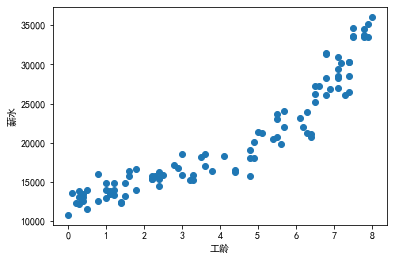

In [10]:
# 通过如下代码可以将此时的散点图绘制出来：
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.scatter(X,Y)
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

3.模型搭建

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,Y)  # 训练模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4.模型可视化

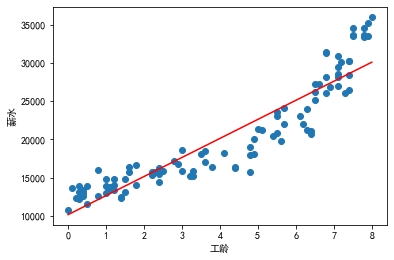

In [12]:
plt.scatter(X,Y)
plt.plot(X, regr.predict(X), color='red')  # color='red'设置为红色
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

5.线性回归方程构造

In [13]:
print('系数a为:' + str(regr.coef_[0]))
print('截距b为:' + str(regr.intercept_))

系数a为:2497.1513476046866
截距b为:10143.131966873787


所以此时的一元线性回归曲线方程为：y = 2497*x + 10143

# 补充知识点：模型优化 - 一元多次线性回归模型

对于一元线性回归模型而言，其实它还有一个进阶版本，叫作一元多次线性回归模型，比较常见的有一元二次线性回归模型，其格式如下：

**y = a*x^2 + b*x + c**

我们之所以还会研究一元多次线性回归模型，是因为有时真正契合的趋势线可能不是一条直线，而是一条曲线，比如下图根据一元二次线性回归模型形成的曲线更契合散点图背后的趋势。
![图片链接](https://uploader.shimo.im/f/KY7rIltpd5AEfgFI.png!thumbnail)

In [14]:
# 通过如下代码生成二次项数据：
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

In [15]:
print(X_[0:5])

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]
 [1.   0.3  0.09]]


In [16]:
# 模型训练
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

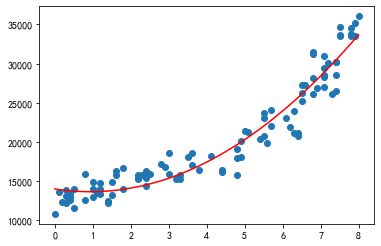

In [17]:
# 可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X_), color='red')
plt.show()

In [18]:
# 打印系数和常数项
print(regr.coef_)  # 获取系数a, b 
print(regr.intercept_)  # 获取常数项c

[   0.         -743.68080444  400.80398224]
13988.159332096882


此时的系数项中为3个数，第一个0对应之前生成的X_常数项前面的系数，也对应之前说的X_的常数项不会产生影响；-743.68代表的X_一次项前面的系数，也即系数b；400.8代表的X_二次项前面的系数，也即系数a；而13988则代表常数项c，所以该一元二次线性回归方程为：

**y = 400.8*x^2 - 743.68*x + 13988**